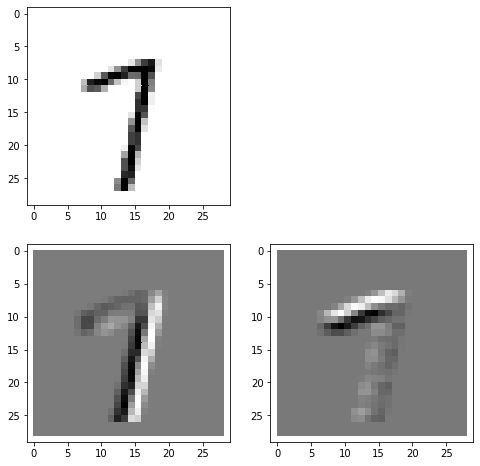

In [36]:
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
tf.set_random_seed(123)

#データの準備
mnist = datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1).astype(np.float32) / 255



#縦方向のエッジを検出するフィルター
vedge_fil = np.array([[-2, 1, 1],
                     [-2, 1, 1],
                     [-2, 1, 1]],
                     dtype = float)

#横方向のエッジを検出するフィルター
hedge_fil = np.array([[1, 1, 1,],
                     [1, 1, 1],
                     [-2,-2,-2]],
                    dtype = float)

#フィルターを適用する画像のインデックス
img_id = 42
#画像のピクセル値を取得
img_x = x_train[img_id, :, :, 0]
img_height = 28
img_width = 28

#画像データを28*28行列に変換
img_x = img_x.reshape(img_height, img_width)

#フィルター適用後の値を代入する配列を用意
vedge = np.zeros_like(img_x)
hedge = np.zeros_like(img_x)

#フィルターを適用
for h in range(img_height - 3):
    for w in range(img_width - 3):
        img_region = img_x[h:h+3, w:w+3]
        vedge[h + 1, w + 1] = np.dot(img_region.reshape(-1),
                                     vedge_fil.reshape(-1))
        hedge[h + 1, w + 1] = np.dot(img_region.reshape(-1),
                                     hedge_fil.reshape(-1))
        
        
#画像の出力
plt.figure(figsize = (8, 8))
plt.subplots_adjust(wspace = 0.2)
plt.gray()

plt.subplot(2, 2, 1)
plt.pcolor(1 - img_x)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(2, 2, 3)
plt.pcolor(- vedge)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(2, 2, 4)
plt.pcolor(- hedge)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [38]:
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam


#データの読み込み
mnist = datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1).astype(np.float32) / 255
t_train = np_utils.to_categorical(t_train, 10)

x_test = x_test.reshape(10000, 28, 28, 1).astype(np.float32) / 255
t_test = np_utils.to_categorical(t_test, 10)




#モデルの構築
model = Sequential()
model.add(Conv2D(filters = 10,
                kernel_size = (3, 3),
                padding = "same",
                input_shape = (28, 28, 1),
                activation = "relu"))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))


#オブジェクトのコンパイル
model.compile(loss = "categorical_crossentropy",
             optimizer = Adam(),
             metrics = ["accuracy"])

model.summary()

history = model.fit(x_train, 
                    t_train,
                    epochs = 10,
                    batch_size = 100,
                    verbose = 1,
                    validation_data = (x_test, t_test)
                   )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
flatten_2 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                78410     
Total params: 78,510
Trainable params: 78,510
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 7s 113us/step - loss: 0.2946 - acc: 0.9203 - val_loss: 0.1293 - val_acc: 0.9644
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1095 - acc: 0.9691 - val_loss:

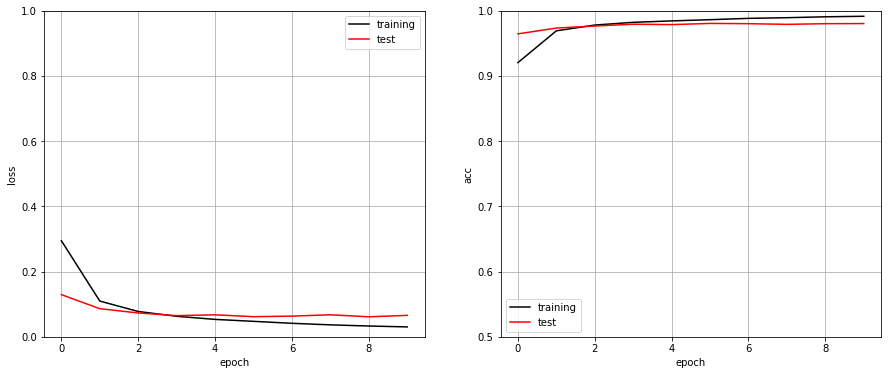

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 6))
plt.subplots_adjust(wspace = 0.2)


plt.subplot(1, 2, 1)
plt.plot(history.history["loss"],
         label = "training",
        color = "black")

plt.plot(history.history["val_loss"],
         label = "test",
         color = "red")

plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")


plt.subplot(1, 2, 2)
plt.plot(history.history["acc"],
        label = "training",
        color = "black")

plt.plot(history.history["val_acc"],
        label = "test", 
        color = "red")

plt.ylim(0.5, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")


plt.show()

In [40]:
#モデルの評価
loss, acc = model.evaluate(x_test, t_test, verbose = 0)
print("test_loss: {:.3f}, test_acc: {:.3f}".format(loss, acc))


test_loss: 0.066, test_acc: 0.980


In [42]:
#モデルの構築

model = Sequential()

#畳み込み層１
model.add(Conv2D(filters = 16,
                kernel_size = (3, 3),
                input_shape = (28, 28, 1),
                padding = "same",
                activation = "relu")
         )

#畳み込み層２
model.add(Conv2D(filters = 32,
                kernel_size = (3, 3),
                padding = "same",
                activation = "relu")
         )

#プーリング層１
model.add(MaxPooling2D(pool_size = (2, 2)))

#畳み込み層３
model.add(Conv2D(filters = 64,
                kernel_size = (3, 3),
                padding = "same",
                activation = "relu")
         )

#プーリング層２
model.add(MaxPooling2D(pool_size = (2, 2)))

#ドロップアウト層
model.add(Dropout(0.5))

#Flatten層
model.add(Flatten())

#全結合層
model.add(Dense(128, activation = "relu"))

#出力層
model.add(Dense(10, activation = "softmax"))



#Sequentialオブジェクトのコンパイル
model.compile(loss = "categorical_crossentropy",
             optimizer = Adam(),
             metrics = ["accuracy"])

model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
__________________________

In [43]:
#モデルの学習
hist = model.fit(x_train,
                t_train,
                batch_size = 100,
                epochs = 10,
                verbose = 1,
                validation_data = (x_test, t_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 50s 840us/step - loss: 0.2045 - acc: 0.9361 - val_loss: 0.0466 - val_acc: 0.9838
Epoch 2/10
60000/60000 [==============================] - 50s 833us/step - loss: 0.0647 - acc: 0.9802 - val_loss: 0.0340 - val_acc: 0.9897
Epoch 3/10
60000/60000 [==============================] - 50s 836us/step - loss: 0.0485 - acc: 0.9849 - val_loss: 0.0291 - val_acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0378 - acc: 0.9877 - val_loss: 0.0260 - val_acc: 0.9909
Epoch 5/10
60000/60000 [==============================] - 50s 835us/step - loss: 0.0325 - acc: 0.9893 - val_loss: 0.0217 - val_acc: 0.9932
Epoch 6/10
60000/60000 [==============================] - 50s 836us/step - loss: 0.0286 - acc: 0.9908 - val_loss: 0.0247 - val_acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - 50s 836us/step - loss: 0.0243 - acc: 0.9923 - val_loss: 0.

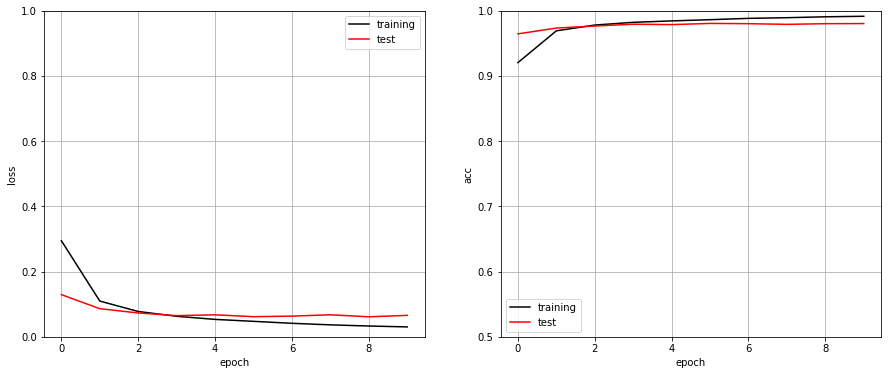

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 6))
plt.subplots_adjust(wspace = 0.2)


plt.subplot(1, 2, 1)
plt.plot(history.history["loss"],
         label = "training",
        color = "black")

plt.plot(history.history["val_loss"],
         label = "test",
         color = "red")

plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")


plt.subplot(1, 2, 2)
plt.plot(history.history["acc"],
        label = "training",
        color = "black")

plt.plot(history.history["val_acc"],
        label = "test", 
        color = "red")

plt.ylim(0.5, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")


plt.show()